# Determinación de voto Migratorio

El presente trabajo de Aprendizaje Automático pretende formular un modelo que permita determinar y finalmente predecir la presencia del voto migratorio a instancias de un set de datos generado por una encuesta de investigación electoral.

La importancia de la formulación de un modelo que logre clasificar adecuadamente este fenómeno de comportamiento electoral es importante ya que genera un aporte significativo al analisis competitivo electoral.

In [ ]:
#1 REGRESIÓN LOGÍSTICA
#Importamos todas las librerias que utilizaremos en el desarrollo del modelo
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
#2 Cargamos los datos de entrada del archivo EXCEL contenido en nuestro Drive
dataframe = pd.read_excel("/content/drive/MyDrive/APRENDIZAJE AUTOMATICO/BASE DATOS PARCIAL.xlsx")
dataframe.head()

,GOB1,GOB2,GOBNO
0,1,6,3
1,1,2,3
2,1,5,3
3,1,2,5
4,7,7,7


**CONTENIDO DEL DATAFRAME**

A los efectos de comprender el contenido del DataFrame, observamos 3 columnas.

GOB1: responde a la pregunta ¿si las elecciones fueran hoy, a cual de los siguientes candidatos votaria?

GOB2: ¿cual seria su segunda opcion?

GOBNO: ¿a quien no votaria nunca?

OPCIONES:

1: CANDIDATO A

2: CANDIDATO B

3 CANDIDATO C

4 CANDIDATO D

5 CANDIDATO E

6 VOTO EN BLANCO

7 NO SABE/NO CONTESTA

Aqui creamos una cuarta columna llamada MIGRA, bajo condiciones especificas que nos permitiran individualizar un nuevo universo de observacion electoral, que son aquellos electores que muestran actitud de migrar hacia una nueva oferta electoral.  Esto lo conseguimos cuando logramos individualizar aquellos encuestados que en la primera opcion eligen candidatos y en la segunda opcion tambien. cuando presenciamos esto le pedimos al codigo que nos entregue un digito 1 y cuando no es asi, nos entrega un 0.


In [ ]:
#3 Crear una cuarta columna llamada MIGRA que contendrá 1 si en GOB1 y GOB2 se repiten los dígitos del 1 al 5, de lo contrario será 0.
def repetir_digitos(row):
    if (row['GOB1'] in range(1, 6) and row['GOB2'] in range(1, 6)):
        return 1
    else:
        return 0

dataframe['MIGRA'] = dataframe.apply(repetir_digitos, axis=1)

Aqui imprimimos el Data Frame para veirficar la creacion de esta cuarta columna de datos

In [ ]:
#4 verificacion del 3
dataframe.head()

,GOB1,GOB2,GOBNO,MIGRA
0,1,6,3,0
1,1,2,3,1
2,1,5,3,1
3,1,2,5,1
4,7,7,7,0


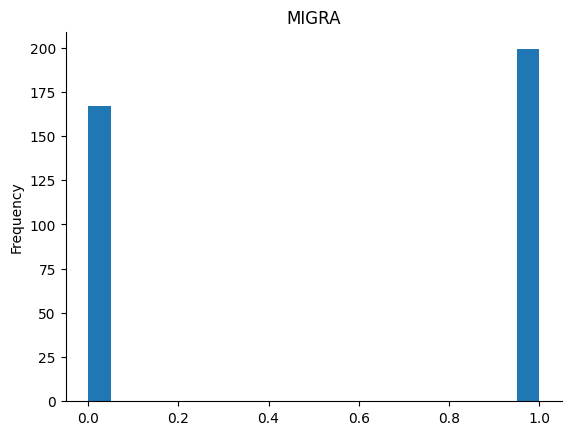

In [ ]:
# 5 Graficamos la distribucion de frecuencias de la columna Migra

from matplotlib import pyplot as plt
dataframe['MIGRA'].plot(kind='hist', bins=20, title='MIGRA')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# 6 Analisis exploratorio.
#Realizamos una descipcion estadistica basica de las distintas variables del set de datos, cantidad, media, devio standard, valor minimo, primer cuartil, segundo cuartil, tercer cuartil, valor maximo.
dataframe.describe()

,GOB1,GOB2,GOBNO,MIGRA
count,366.000000,366.000000,366.000000,366.000000
mean,2.300546,4.650273,4.390710,0.543716
std,2.004748,2.242329,1.966241,0.498767
min,1.000000,1.000000,1.000000,0.000000
25%,1.000000,3.000000,3.000000,0.000000
50%,1.000000,5.000000,4.000000,1.000000
75%,3.000000,7.000000,7.000000,1.000000
max,7.000000,7.000000,7.000000,1.000000


In [ ]:
#7  Analisis exploratorio.
#Descripcion de las columnas, sus nombres cantidad de datos contenidos y tipo de datos
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   GOB1    366 non-null    int64
 1   GOB2    366 non-null    int64
 2   GOBNO   366 non-null    int64
 3   MIGRA   366 non-null    int64
dtypes: int64(4)
memory usage: 11.6 KB


En el analisis exploratorio de los datos podemos observar que no tenemos datos nulos, ademas que todos los datos son del tipo numerico y las cantidades entre las variables son iguales.

In [ ]:
#8 imprimimos conteo o frecuencia del contenido de la columna GOB1 en orden descendente, equivalente a intencion de voto
print(dataframe['GOB1'].value_counts())

GOB1
1    220
3     53
7     39
2     26
5     16
4      7
6      5
Name: count, dtype: int64


Text(0, 0.5, 'Frecuencia')

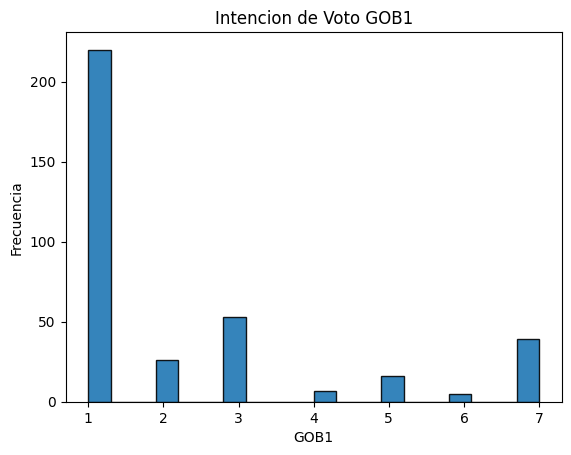

In [ ]:
# 9 Creamos el histograma realizando la representacion grafica de la distribucion de frecuencia del contenido de los datos de la columna GOB1
plt.hist(dataframe['GOB1'], bins=20, edgecolor='k', alpha=0.90)
plt.title('Intencion de Voto GOB1')
plt.xlabel('GOB1')
plt.ylabel('Frecuencia')

In [ ]:
# 10 imprimimos conteo del contenido de la columna GOB2 en orden descendente
print(dataframe['GOB2'].value_counts())

GOB2
7    140
3     66
2     45
1     38
5     34
6     27
4     16
Name: count, dtype: int64


Text(0, 0.5, 'Frecuencia')

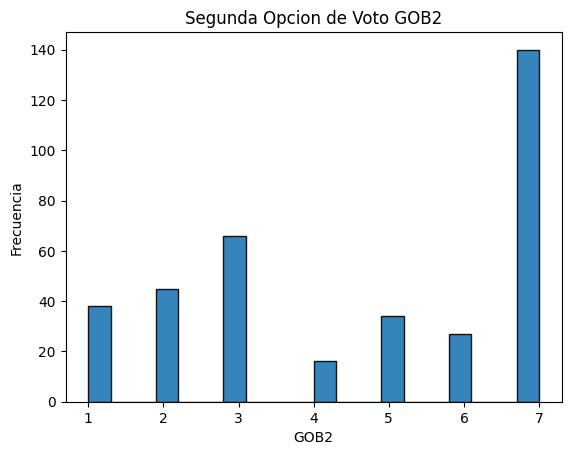

In [ ]:
# 11 Creamos el histograma realizando la representacion grafica de la distribucion de frecuencia del contenido de los datos de la columna GOB2
plt.hist(dataframe['GOB2'], bins=20, edgecolor='k', alpha=0.90)
plt.title('Segunda Opcion de Voto GOB2')
plt.xlabel('GOB2')
plt.ylabel('Frecuencia')

In [ ]:
# 12 imprimimos conteo del contenido de la columna GOBNO en orden descendente
print(dataframe['GOBNO'].value_counts())

GOBNO
7    100
3     97
5     62
4     40
2     29
1     28
6     10
Name: count, dtype: int64


Text(0, 0.5, 'Frecuencia')

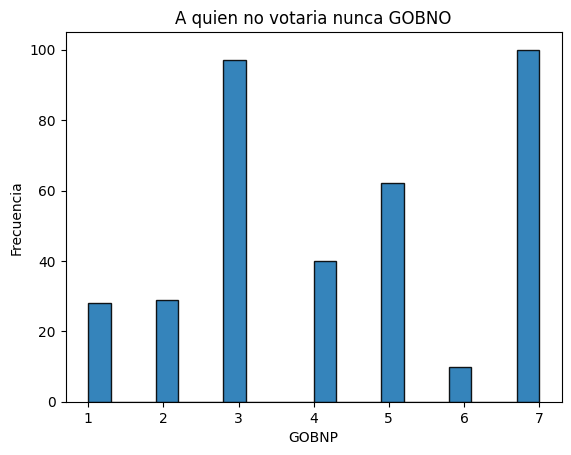

In [ ]:
# 13 Creamos el histograma realizando la representacion grafica de la distribucion de frecuencia del contenido de los datos de la columna GOBNO
plt.hist(dataframe['GOBNO'], bins=20, edgecolor='k', alpha=0.90)
plt.title('A quien no votaria nunca GOBNO')
plt.xlabel('GOBNP')
plt.ylabel('Frecuencia')

In [ ]:
# 14 imprimimos conteo del contenido de la columna MIGRA en orden descendente
print(dataframe['MIGRA'].value_counts())

MIGRA
1    199
0    167
Name: count, dtype: int64


Aqui podemos apreciar que en relacion a la nueva columna MIGRA se optienen 199 encuestados que demuestran migrar hacia una segunda oferta electoral, lo que representa el 54.4% de los mismos. Por otro lado 167 de ellos no migraria hacia otra opcion electoral, lo que representa un 45.6%

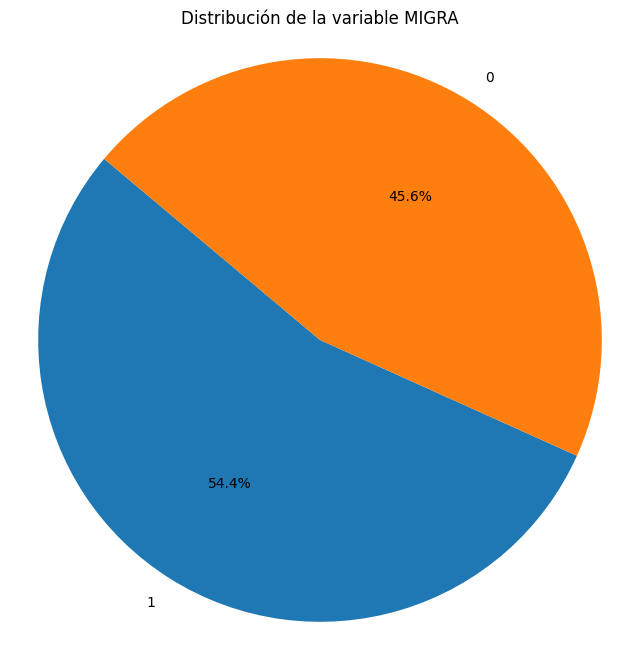

In [ ]:
# 15 Aqui realizamos un grafico de torta ante la presencia de un fenomeno dicotomico o binario para establecer la presencia o ausencia del voto migratorio
plt.figure(figsize=(8, 8))
plt.pie(dataframe['MIGRA'].value_counts(), labels=dataframe['MIGRA'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribución de la variable MIGRA')
plt.show()

In [ ]:
# 16 MIGRACION DE VOTO
#imprimimos la cantidad de electores que migrarian y los que no
total_frecuencia_0 = dataframe['MIGRA'].value_counts().get(0, 0)
total_frecuencia_1 = dataframe['MIGRA'].value_counts().get(1, 0)

print(f'Los electores que migran son: {total_frecuencia_1}')
print(f'Los electores que no migran son: {total_frecuencia_0}')

Los electores que migran son: 199
Los electores que no migran son: 167


In [ ]:
# 17 Intencion de voto de los candidatos
#imprimimos la intencion de voto de cada uno de los candidatos contando la frecuencia de cada uno de ellos
total_frecuencia_1 = dataframe['GOB1'].value_counts().get(1, 0)
total_frecuencia_2 = dataframe['GOB1'].value_counts().get(2, 0)
total_frecuencia_3 = dataframe['GOB1'].value_counts().get(3, 0)
total_frecuencia_4 = dataframe['GOB1'].value_counts().get(4, 0)
total_frecuencia_5 = dataframe['GOB1'].value_counts().get(5, 0)


print(f'La intencion de voto del candidato 1 es: {total_frecuencia_1}')
print(f'La intencion de voto del candidato 2 es: {total_frecuencia_2}')
print(f'La intencion de voto del candidato 3 es: {total_frecuencia_3}')
print(f'La intencion de voto del candidato 4 es: {total_frecuencia_4}')
print(f'La intencion de voto del candidato 5 es: {total_frecuencia_5}')

La intencion de voto del candidato 1 es: 220
La intencion de voto del candidato 2 es: 26
La intencion de voto del candidato 3 es: 53
La intencion de voto del candidato 4 es: 7
La intencion de voto del candidato 5 es: 16


Uno de los analisis mas importantes en clave electoral es la individualizacion de las distinttas tipologias electorales, en tal sentido aqui trabajaremos en individualizarlos a partir de los datos contenidos en el DataFrame.
Justamente el Voto Duro, es aquel elector que no migra hacia ninguna otra opcion electoral.

In [ ]:
# 18 Definimos la función para contar los votos duros
def contar_votos_duros(row):
    if (row['GOB1'] in range(1, 6) and row['GOB2'] == row['GOB1']) or (row['GOB1'] in range(1, 6) and row['GOB2'] in [6, 7]):
        return 1
    else:
        return 0

In [ ]:
# 19 Aplicar la función a cada fila y sumar los votos duros en GOB1
dataframe['VotosDuros'] = dataframe.apply(contar_votos_duros, axis=1)
total_votos_duros = dataframe['VotosDuros'].sum()

print(f'El total de votos duros de todos los candidatos es: {total_votos_duros}')

El total de votos duros de todos los candidatos es: 126


In [ ]:
# 20 Contar el número de votos duros de cada uno de los candidatos
votos_duros_con_1 = dataframe[dataframe['GOB1'] == 1]['VotosDuros'].sum()
votos_duros_con_2 = dataframe[dataframe['GOB1'] == 2]['VotosDuros'].sum()
votos_duros_con_3 = dataframe[dataframe['GOB1'] == 3]['VotosDuros'].sum()
votos_duros_con_4 = dataframe[dataframe['GOB1'] == 4]['VotosDuros'].sum()
votos_duros_con_5 = dataframe[dataframe['GOB1'] == 5]['VotosDuros'].sum()


print(f'Los votos duros del candidato 1 son: {votos_duros_con_1}')
print(f'Los votos duros del candidato 2 son: {votos_duros_con_2}')
print(f'Los votos duros del candidato 3 son: {votos_duros_con_3}')
print(f'Los votos duros del candidato 4 son: {votos_duros_con_4}')
print(f'Los votos duros del candidato 5 son: {votos_duros_con_5}')

Los votos duros del candidato 1 son: 97
Los votos duros del candidato 2 son: 6
Los votos duros del candidato 3 son: 14
Los votos duros del candidato 4 son: 3
Los votos duros del candidato 5 son: 6


In [ ]:
# 21
votos_duros_por_candidato = [
    dataframe[dataframe['GOB1'] == i]['VotosDuros'].sum() for i in range(1, 6)
]

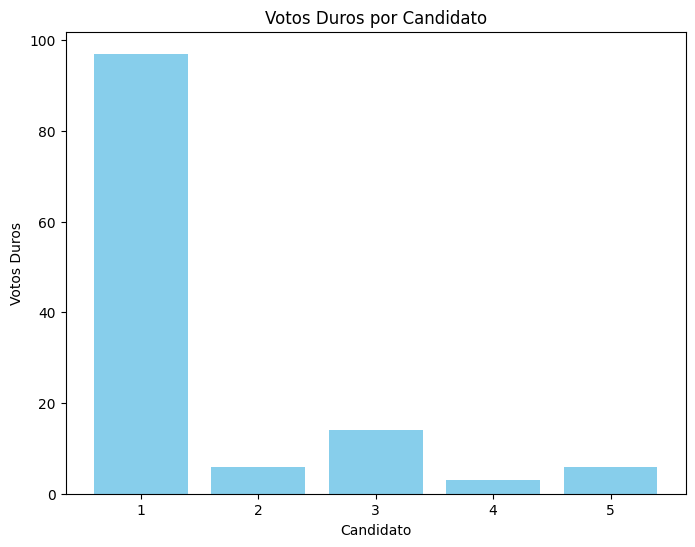

In [ ]:
# 22
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), votos_duros_por_candidato, color='skyblue')
plt.xlabel('Candidato')
plt.ylabel('Votos Duros')
plt.title('Votos Duros por Candidato')
plt.xticks(range(1, 6))  # Etiquetas para cada candidato
plt.show()

Por otro lado, siguiendo las distintas tipologias de analisis electoral tenemos el Voto Blando, que es aquel elector que eligiendo a un candidato en particular, en una hipotetica segunda instancia podria migrar hacia otro opcion electoral. Aqui vamos a trabajar en individualizarlo y cuantificarl el fenomeno para cada uno de los candidatos.

In [ ]:
#23 Contamos el voto Blando de los candidatos
voto_blando_1 =(total_frecuencia_1 - votos_duros_con_1)
voto_blando_2 =(total_frecuencia_2 - votos_duros_con_2)
voto_blando_3 =(total_frecuencia_3 - votos_duros_con_3)
voto_blando_4 =(total_frecuencia_4 - votos_duros_con_4)
voto_blando_5 =(total_frecuencia_5 - votos_duros_con_5)

print(f'El voto blando del candidato 1 es: {voto_blando_1}')
print(f'El voto blando del candidato 2 es: {voto_blando_2}')
print(f'El voto blando del candidato 3 es: {voto_blando_3}')
print(f'El voto blando del candidato 4 es: {voto_blando_4}')
print(f'El voto blando del candidato 5 es: {voto_blando_5}')

El voto blando del candidato 1 es: 123
El voto blando del candidato 2 es: 20
El voto blando del candidato 3 es: 39
El voto blando del candidato 4 es: 4
El voto blando del candidato 5 es: 10


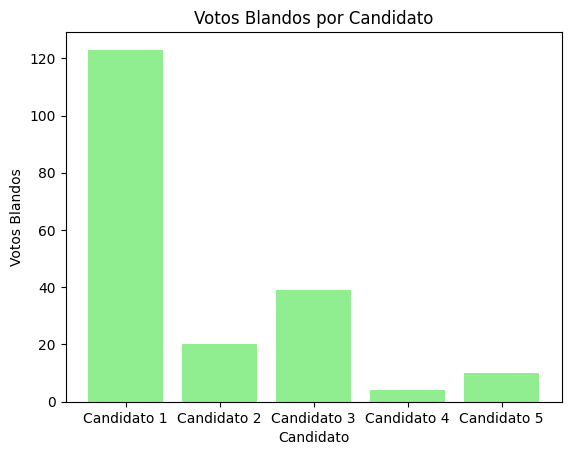

In [ ]:
# 24 Crear una lista con los votos blandos por candidato
votos_blandos = [voto_blando_1, voto_blando_2, voto_blando_3, voto_blando_4, voto_blando_5]

# Crear una lista con los nombres de los candidatos
candidatos = ['Candidato 1', 'Candidato 2', 'Candidato 3', 'Candidato 4', 'Candidato 5']

# Crear el gráfico de barras
plt.bar(candidatos, votos_blandos, color='lightgreen')
plt.xlabel('Candidato')
plt.ylabel('Votos Blandos')
plt.title('Votos Blandos por Candidato')
plt.show()

Los Votos Posibles, son los que reciben los candidatos en concepto de migracion electoral, aqui los vamos a individualizar y cuantificar para cada candidato.

In [ ]:
# 25 desarrollamos el conteo de los Votos Posibles de cada candidato
frecuencia_1_en_GOB2 = (dataframe['GOB2'] == 1).sum()
frecuencia_2_en_GOB2 = (dataframe['GOB2'] == 2).sum()
frecuencia_3_en_GOB2 = (dataframe['GOB2'] == 3).sum()
frecuencia_4_en_GOB2 = (dataframe['GOB2'] == 4).sum()
frecuencia_5_en_GOB2 = (dataframe['GOB2'] == 5).sum()

print(f'El voto posible del 1 es: {frecuencia_1_en_GOB2}')
print(f'El voto posible del 2 es: {frecuencia_2_en_GOB2}')
print(f'El voto posible del 3 es: {frecuencia_3_en_GOB2}')
print(f'El voto posible del 4 es: {frecuencia_4_en_GOB2}')
print(f'El voto posible del 5 es: {frecuencia_5_en_GOB2}')

El voto posible del 1 es: 38
El voto posible del 2 es: 45
El voto posible del 3 es: 66
El voto posible del 4 es: 16
El voto posible del 5 es: 34


Para el caso del Voto Imposible es aquel que define explicitamente que nunca votara por el candidato observado, aqui lo vamos a individualizar y a cuantificar el fenomeno para cada candidato en cuestion.

In [ ]:
#26 Desarrollamos el conteo de los Votos Imposibles cde cada uno de los candidatos
frecuencia_1_en_GOBNO = (dataframe['GOBNO'] == 1).sum()
frecuencia_2_en_GOBNO = (dataframe['GOBNO'] == 2).sum()
frecuencia_3_en_GOBNO = (dataframe['GOBNO'] == 3).sum()
frecuencia_4_en_GOBNO = (dataframe['GOBNO'] == 4).sum()
frecuencia_5_en_GOBNO = (dataframe['GOBNO'] == 5).sum()

print(f'El voto imposible del 1 es: {frecuencia_1_en_GOBNO}')
print(f'El voto imposible del 2 es: {frecuencia_2_en_GOBNO}')
print(f'El voto imposible del 3 es: {frecuencia_3_en_GOBNO}')
print(f'El voto imposible del 4 es: {frecuencia_4_en_GOBNO}')
print(f'El voto imposible del 5 es: {frecuencia_5_en_GOBNO}')

El voto imposible del 1 es: 28
El voto imposible del 2 es: 29
El voto imposible del 3 es: 97
El voto imposible del 4 es: 40
El voto imposible del 5 es: 62


Aqui procedemos a establecer los pisos y techos electorales de cada uno de los candidatos presentes en el DataFrame.
Para esto como piso electoral establecemos el Nucleo Duro de votos y como techo electoral la frecuencia total mas la frecuencia de migracion de la columna GOB2.

In [ ]:
#27 Determinamos el Piso y techo electoral de cada candidato
print(f'El piso electoral del candidato 1 es: {votos_duros_con_1} y su techo electoral es: {total_frecuencia_1 + frecuencia_1_en_GOB2}')
print(f'El piso electoral del candidato 2 es: {votos_duros_con_2} y su techo electoral es: {total_frecuencia_2 + frecuencia_2_en_GOB2}')
print(f'El piso electoral del candidato 3 es: {votos_duros_con_3} y su techo electoral es: {total_frecuencia_3 + frecuencia_3_en_GOB2}')
print(f'El piso electoral del candidato 4 es: {votos_duros_con_4} y su techo electoral es: {total_frecuencia_4 + frecuencia_4_en_GOB2}')
print(f'El piso electoral del candidato 5 es: {votos_duros_con_5} y su techo electoral es: {total_frecuencia_5 + frecuencia_5_en_GOB2}')

El piso electoral del candidato 1 es: 97 y su techo electoral es: 258
El piso electoral del candidato 2 es: 6 y su techo electoral es: 71
El piso electoral del candidato 3 es: 14 y su techo electoral es: 119
El piso electoral del candidato 4 es: 3 y su techo electoral es: 23
El piso electoral del candidato 5 es: 6 y su techo electoral es: 50


Aqui vamos a definir el Voto Dificil, que esta dentro del universo de los indecisos y para cada candidato en particular surgira producto de la diferencia de la frecuencia total de los registros del DataFrame, menos la columna GOB1, GOB2 Y GOBNO para cada candidato.
En este sentido cabe destacar que los candidatos mas competitivos tendran una menor cantidad de votos dificiles y al contrario sucedera con los candidatos menos competitivos.

In [ ]:
#28 Definimos los votos dificiles de cada candidato

print(f'El voto dificil del candidato 1 es: {dataframe.count() - total_frecuencia_1 - frecuencia_1_en_GOB2 - frecuencia_1_en_GOBNO}')
print(f'El voto dificil del candidato 2 es: {dataframe.count() - total_frecuencia_2 - frecuencia_2_en_GOB2 - frecuencia_2_en_GOBNO}')
print(f'El voto dificil del candidato 3 es: {dataframe.count() - total_frecuencia_3 - frecuencia_3_en_GOB2 - frecuencia_3_en_GOBNO}')
print(f'El voto dificil del candidato 4 es: {dataframe.count() - total_frecuencia_4 - frecuencia_4_en_GOB2 - frecuencia_4_en_GOBNO}')
print(f'El voto dificil del candidato 5 es: {dataframe.count() - total_frecuencia_5 - frecuencia_5_en_GOB2 - frecuencia_5_en_GOBNO}')

El voto dificil del candidato 1 es: GOB1          80
GOB2          80
GOBNO         80
MIGRA         80
VotosDuros    80
dtype: int64
El voto dificil del candidato 2 es: GOB1          266
GOB2          266
GOBNO         266
MIGRA         266
VotosDuros    266
dtype: int64
El voto dificil del candidato 3 es: GOB1          150
GOB2          150
GOBNO         150
MIGRA         150
VotosDuros    150
dtype: int64
El voto dificil del candidato 4 es: GOB1          303
GOB2          303
GOBNO         303
MIGRA         303
VotosDuros    303
dtype: int64
El voto dificil del candidato 5 es: GOB1          254
GOB2          254
GOBNO         254
MIGRA         254
VotosDuros    254
dtype: int64


# **MODELO**
Iniciamos la instancia de creacion del modelo de de regresion logistica en el que vamos a seleccionar y discriminar aquellos electores que migran de los que no migran, categorizados debidamente en la nueva columna MIGRA, que surge del analisis de las columnas GOB1 y GOB2.

In [ ]:
# 29 vamos a confirmar los nombres de las columnas que tenemos en nuestro DataFrame
print(dataframe.columns)

Index(['GOB1', 'GOB2', 'GOBNO', 'MIGRA', 'VotosDuros'], dtype='object')


In [ ]:
# 30 organizamos los datos en dos matrices de analisis: X con caracteristicas que contienen a los candidatos del 1 al 5 y las opciones de voto en blanco y no sabe no contesta, e Y como variable objetivo que nos ofrece como resultado si se da la presencia de voto migratorio con el digito 1, de lo contrario nos dice 0.
X = np.array(dataframe.drop(['GOBNO', 'VotosDuros'], axis=1)) #eliminamos las columnas GOBNO y VotosDuros de la matriz de analisis
y = np.array(dataframe['MIGRA'])
X.shape

(366, 3)

In [ ]:
# 31 confirmamos los nombres de las columnas que nos quedan luego de eliminar las columnas GOBNO Y VotosDuros
X = dataframe.drop(['GOBNO', 'VotosDuros'], axis=1)
print(X.columns)

Index(['GOB1', 'GOB2', 'MIGRA'], dtype='object')


In [ ]:
# 32 imprimimos la cabecera de las columnas
print(X.head())

   GOB1  GOB2  MIGRA
0     1     6      0
1     1     2      1
2     1     5      1
3     1     2      1
4     7     7      0


In [ ]:
# 33 creamos una instancia del modelo de regresión logística, importamos la clase LogisticRegression de la biblioteca sklearn.linear_model, que nos permite construir y entrenar un modelo de regresión logística.
model = linear_model.LogisticRegression(solver='liblinear') #creamos una instancia del modelo de regresión logística y la asignamos a la variable model. También se especifica el argumento solver como 'liblinear', que es un algoritmo de optimización utilizado para ajustar los parámetros del modelo. 'liblinear' es adecuado para problemas de clasificación binaria y es una opción común para problemas pequeños o medianos.
model.fit(X,y) # aqui entrenamos el modelo donde fit realizara el ajuste del modelo en funcion de los datos registrados previamente en X

LogisticRegression(solver='liblinear')

In [ ]:
# 34 Aqui ejecutamos las predicciones en el conjunto de datos de características (X) utilizando el modelo de regresión logística que ya entrenamos previamente
predictions = model.predict(X)
print(predictions[0:20])

[0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0]


En esta prediccion podemos observar que 0 equivale a ausencia de voto migratorio y 1 a presencia del mismo.

Ahora calculamos la precisión del modelo de regresión logística que ejecutamos utilizando el método "score" para un modelo de clasificación en scikit-learn (como un modelo de regresión logística) para calcular y devolver la precisión del modelo en un conjunto de datos de características (X) y etiquetas de clase (y). como resultado final mientras mas aproximado a 0 mas impreciso es el modelo, y cuando mas cercano a 1 mas preciso.


In [ ]:
# 35  Ahora calculamos la precisión del modelo de regresión logística que ejecutamos.
model.score(X,y)

1.0

Aqui vamos a dividir el conjunto de datos en dos subconjuntos: uno para entrenamiento (train) y otro para validación (validation) para evaluar el rendimiento de un modelo.

Se utiliza la función train_test_split de la biblioteca scikit-learn (model_selection) para dividir tus datos en cuatro conjuntos diferentes:

X_train: Conjunto de características (variables independientes) para entrenamiento.
X_validation: Conjunto de características para validación.
Y_train: Conjunto de etiquetas de clase (variables dependientes) para entrenamiento.
Y_validation: Conjunto de etiquetas de clase para validación.
Los argumentos utilizados en la función train_test_split son:

X y y: Representan el conjunto de datos original de características y etiquetas de clase.
test_size: Especifica la proporción de datos que se reservará para validación, que en este caso es el 20%.
random_state: Establece la semilla aleatoria para garantizar la reproducibilidad de la división.

In [ ]:
# 36 Validacion del modelo con un 20% destinado a la validacion y el 80% al entrenamiento
validation_size = 0.20 #se define la variable validation_size y se le asigna el valor 0.20, lo que significa que se reservará el 20% del conjunto de datos total para validación y el 80% restante se utilizará para entrenamiento.
seed = 7  #Se define la variable seed y se le asigna un valor, en este caso, el número 7. Esto se utiliza para establecer una semilla aleatoria que garantiza que la división de los datos sea reproducible.
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

Aqui evaluaremos el modelo de regresión logística utilizando validación cruzada.

Se crea una instancia de KFold del módulo model_selection de scikit-learn. n_splits se establece en 10, lo que significa que se realizará una validación cruzada de 10 pliegues. En la validación cruzada de 10 pliegues, los datos de entrenamiento se dividen en 10 partes iguales, y el modelo se entrena y evalúa 10 veces, utilizando cada una de las 10 partes como conjunto de prueba en turnos sucesivos.

Se utiliza la función cross_val_score de scikit-learn para realizar la validación cruzada del modelo. Los argumentos son los siguientes:

model: Representa el modelo de regresión logística que se entrenará y evaluará en cada pliegue de validación.
X_train y Y_train: Son los conjuntos de características y etiquetas de clase utilizados para entrenar el modelo.
cv: Representa la estrategia de validación cruzada que se configuró previamente con 10 pliegues.
scoring: Especifica la métrica de evaluación utilizada, en este caso, 'accuracy', que mide la precisión del modelo.
cv_results será una lista que contiene la puntuación de precisión del modelo para cada uno de los 10 pliegues de validación.

In [ ]:
# 37 ejecutamos un modelo de validacion cruzada para evaluar el rendimiento del modelo con 10 pliegues
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) #se crea un mensaje que combina el nombre del modelo, la puntuación media de precisión de los pliegues y la desviación estándar de las puntuaciones de precisión.
print(msg)

Logistic Regression: 1.000000 (0.000000)


Aqui vamos a reliazar una modificacion en el hiperparametro de los pliegues de validacion cruzadaincrementandolos a 15 para evaluar el resultado del mismo

In [ ]:
# 38 ejecutamos un modelo de validacion cruzada para evaluar el rendimiento del modelo con 15 pliegues
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=15)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) #se crea un mensaje que combina el nombre del modelo, la puntuación media de precisión de los pliegues y la desviación estándar de las puntuaciones de precisión.
print(msg)

Logistic Regression: 1.000000 (0.000000)


Calculamos la precision del modelo en el conjunto de los datos de validacion utilizando la función accuracy_score.
En este caso la precisión se refiere a la fracción de predicciones correctas sobre el total de predicciones.

In [ ]:
# 39 calculamos la precision del modelo en funcion del conjunto de datos de validacion y prediccion
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

1.0


Ahora vamos a imprimir una matriz de confusión que resume el rendimiento de nuestro modelo de clasificación en un conjunto de validación.
utilizamos la función confusion_matrix para calcular la matriz de confusión.

Y_validation: Representa las etiquetas de clase reales (verdaderas) en el conjunto de validación. Estas son las etiquetas que se conocen y se utilizan como punto de referencia para evaluar el modelo.

predictions: Representa las etiquetas de clase predichas por el modelo en el conjunto de validación. Estas son las etiquetas que el modelo ha generado a partir de sus predicciones.

La matriz de confusión es una tabla que muestra la cantidad de verdaderos positivos (TP), verdaderos negativos (TN), falsos positivos (FP) y falsos negativos (FN) resultantes de las predicciones del modelo en el conjunto de validación.


In [ ]:
# 40 realizamos el reporte de la matriz de confusión que muestra cómo nuestro modelo de clasificación se desempeñó respecto del conjunto de validación
print(confusion_matrix(Y_validation, predictions))

[[29  0]
 [ 0 45]]


Ahora vamos a generar un informe de clasificación que resume las métricas de rendimiento de nuestro modelo de clasificación en un conjunto de validación.

utilizamos la función classification_report para generar un informe detallado de las métricas de rendimiento del modelo en el conjunto de validación. La función toma dos argumentos:

Y_validation: Representa las etiquetas de clase reales (verdaderas) en el conjunto de validación. Estas son las etiquetas conocidas que se utilizan como punto de referencia para evaluar el modelo.

predictions: Representa las etiquetas de clase predichas por el modelo en el conjunto de validación. Estas son las etiquetas generadas por el modelo en función de sus predicciones.

El informe proporcionará información detallada sobre varias métricas de rendimiento del modelo, que generalmente incluyen:

**Precisión (accuracy):** La proporción de predicciones correctas en relación con el total de predicciones.

**Sensibilidad (recall) o tasa positiva verdadera (TPR)**: La proporción de verdaderos positivos en relación con todos los positivos reales.

**Especificidad (specificity) o tasa negativa verdadera (TNR):** La proporción de verdaderos negativos en relación con todos los negativos reales.

**Valor-F1 (F1-score):** Una métrica que combina precisión y sensibilidad en una única medida de rendimiento.

El informe de clasificación proporciona una visión más completa y detallada del rendimiento del modelo que la matriz de confusión y otras métricas individuales.


In [ ]:
# 41 Imprimimos un informe de Metricas de desempeño del modelo
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        45

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



Ahora vamos a probar el modelo con una nueva carga de datos no conocidos.

En este paso, se crea una matriz Xn utilizando la biblioteca NumPy (np). Cada fila de esta matriz representa una muestra (un conjunto de características) en el nuevo conjunto de datos. En este caso, Xn contiene tres muestras, y cada muestra tiene tres características. Este nuevo conjunto de datos se utilizará para hacer predicciones utilizando el modelo previamente entrenado.

In [ ]:
# 42 probamos el modelo con nuevos datos
Xn = np.array([[6,6,5], [1,1,1],[1,3,0],[5,2,7]])
Yn = model.predict(Xn)
print(Yn)

[1 1 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Ejecutamos una prueba de precision del modelo, si bien ya lo hicimos de forma integral en el informe de clasificacion, aqui lo hacemos de forma particular y especificamente con Precisión (accuracy): La proporción de predicciones correctas en relación con el total de predicciones.


In [ ]:
# 43 ejecutamos una prueba de precision del modelo
precision = accuracy_score(Y_validation, predictions)
print(f'Precisión del modelo: {precision}')

Precisión del modelo: 1.0
